KELOMPOK 8 2024D
Nama Anggota:
1. Eka Aliya (24031554012)
2. Devita Nur Aisyah (24031554125)

======PENGAMBILAN DAN INTEGRASI DATA=====


In [ ]:
!pip install gdown


In [ ]:
import gdown

pdf_link = "https://drive.google.com/file/d/1xGB6_2BpXdYuD_v9vCpn_NFRyg1ONfVI/view?usp=sharing"
gdown.download(pdf_link, "1728546912.pdf.pdf", quiet=False, fuzzy=True)

csv1_link = "https://drive.google.com/file/d/17NusiulfpdS2QjZplkTQsdxogdqxs-Gv/view?usp=sharing"
gdown.download(csv1_link, "bps-od_20948_persentase_penduduk_miskin__prov_di_indonesia_v2_data.csv", quiet=False, fuzzy=True)

csv1_link = "https://drive.google.com/file/d/1BwQ4YcPPUIy8j6Bv2gXI5F1TjuJShoaG/view?usp=sharing"
gdown.download(csv1_link, "Jumlah Keluarga Penerima Manfaat (KPM) dan Anggaran Bantuan Sosial Pangan Menurut Provinsi, 2023.csv", quiet=False, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1xGB6_2BpXdYuD_v9vCpn_NFRyg1ONfVI
To: /content/1728546912.pdf.pdf
100%|██████████| 1.81M/1.81M [00:00<00:00, 226MB/s]
Downloading...
From: https://drive.google.com/uc?id=17NusiulfpdS2QjZplkTQsdxogdqxs-Gv
To: /content/bps-od_20948_persentase_penduduk_miskin__prov_di_indonesia_v2_data.csv
100%|██████████| 1.39k/1.39k [00:00<00:00, 4.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BwQ4YcPPUIy8j6Bv2gXI5F1TjuJShoaG
To: /content/Jumlah Keluarga Penerima Manfaat (KPM) dan Anggaran Bantuan Sosial Pangan Menurut Provinsi, 2023.csv
100%|██████████| 2.12k/2.12k [00:00<00:00, 6.74MB/s]


'Jumlah Keluarga Penerima Manfaat (KPM) dan Anggaran Bantuan Sosial Pangan Menurut Provinsi, 2023.csv'

In [ ]:
#Scraping PDF
!pip install PyPDF2

In [ ]:
import PyPDF2
import pandas as pd
import re

path = "/content/1728546912.pdf.pdf"
reader = PyPDF2.PdfReader(path)

# halaman 28 = index 27
text = reader.pages[27].extract_text()

# regex ambil angka - provinsi - angka_decimal
pattern = r"(\d{1,2})\s+([A-Za-z .]+?)\s+(\d{2},\d{2})"
matches = re.findall(pattern, text)

data_ikp = pd.DataFrame(matches, columns=["Peringkat", "Provinsi", "IKP"])

# rapikan kolom
data_ikp["Peringkat"] = data_ikp["Peringkat"].astype(int)
data_ikp["IKP"] = data_ikp["IKP"].str.replace(",", ".").astype(float)

data_ikp = data_ikp.sort_values("Peringkat").reset_index(drop=True)
data_ikp.to_csv("data_ikp.csv", index=False)

data_ikp

,Peringkat,Provinsi,IKP
0,1,Bali,87.65
1,2,Jawa Tengah,84.80
2,3,DKI Jakarta,83.80
3,4,Sulawesi Selatan,83.36
4,5,Sumatera Barat,83.22
5,6,DI Yogyakarta,83.17
6,7,Jawa Timur,82.46
7,8,Jawa Barat,82.19
8,9,Gorontalo,81.63
9,10,Lampung,81.56


In [ ]:
# Normalisasi nama provinsi hasil scraping
data_ikp['Provinsi'] = data_ikp['Provinsi'].replace({
    'Kep. Bangka Belitung': 'Kepulauan Bangka Belitung',
    'Kep. Riau': 'Kepulauan Riau'
})


In [ ]:
data_ikp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Peringkat  34 non-null     int64  
 1   Provinsi   34 non-null     object 
 2   IKP        34 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 948.0+ bytes


In [ ]:
#File CSV 1
import pandas as pd
data_bpnt=pd.read_csv('/content/Jumlah Keluarga Penerima Manfaat (KPM) dan Anggaran Bantuan Sosial Pangan Menurut Provinsi, 2023.csv')
data_bpnt.head()

,Provinsi,Rencana Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN),Realisasi Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN),Rencana Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp),Realisasi Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp)
0,Aceh,2836431,2780856,1.148840e+12,1.125970e+12
1,Sumatera Utara,4032602,3921537,1.856430e+12,1.807640e+12
2,Sumatera Barat,1690918,1648519,7.677930e+11,7.492250e+11
3,Riau,1581499,1516642,6.472890e+11,6.201750e+11
4,Jambi,911976,885167,4.180250e+11,4.065980e+11


In [ ]:
data_bpnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Provinsi                                                                                34 non-null     object 
 1   Rencana Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN)    34 non-null     int64  
 2   Realisasi Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN)  34 non-null     int64  
 3   Rencana Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp)                             34 non-null     float64
 4   Realisasi Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp)                           34 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
#File CSV 2
data_kemiskinan=pd.read_csv('/content/bps-od_20948_persentase_penduduk_miskin__prov_di_indonesia_v2_data.csv')
data_kemiskinan=data_kemiskinan.rename(columns={'nama_provinsi':'Provinsi'})
data_kemiskinan=data_kemiskinan.rename(columns={'tahun':'Tahun'})
data_kemiskinan.head()

,id,kode_provinsi,Provinsi,persentase_penduduk_miskin,satuan,Tahun
0,495,11,ACEH,14.45,PERSEN,2023
1,496,12,SUMATERA UTARA,8.15,PERSEN,2023
2,497,13,SUMATERA BARAT,5.95,PERSEN,2023
3,498,14,RIAU,6.68,PERSEN,2023
4,499,15,JAMBI,7.58,PERSEN,2023


In [ ]:
data_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          34 non-null     int64  
 1   kode_provinsi               34 non-null     int64  
 2   Provinsi                    34 non-null     object 
 3   persentase_penduduk_miskin  34 non-null     float64
 4   satuan                      34 non-null     object 
 5   Tahun                       34 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.7+ KB


In [ ]:
data_bpnt['Provinsi'] = data_bpnt['Provinsi'].str.strip().str.title()
data_kemiskinan['Provinsi'] = data_kemiskinan['Provinsi'].str.strip().str.title()
data_ikp['Provinsi'] = data_ikp['Provinsi'].str.strip().str.title()

In [ ]:
#MENGGABUNGKAN DATA CSV
data_gabungan1=pd.merge(data_kemiskinan, data_bpnt,on=['Provinsi'], how='inner')
data_gabungan1.head(10)

,id,kode_provinsi,Provinsi,persentase_penduduk_miskin,satuan,Tahun,Rencana Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN),Realisasi Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN),Rencana Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp),Realisasi Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp)
0,495,11,Aceh,14.45,PERSEN,2023,2836431,2780856,1.148840e+12,1.125970e+12
1,496,12,Sumatera Utara,8.15,PERSEN,2023,4032602,3921537,1.856430e+12,1.807640e+12
2,497,13,Sumatera Barat,5.95,PERSEN,2023,1690918,1648519,7.677930e+11,7.492250e+11
3,498,14,Riau,6.68,PERSEN,2023,1581499,1516642,6.472890e+11,6.201750e+11
4,499,15,Jambi,7.58,PERSEN,2023,911976,885167,4.180250e+11,4.065980e+11
5,500,16,Sumatera Selatan,11.78,PERSEN,2023,2780093,2706411,1.134160e+12,1.103550e+12
6,501,17,Bengkulu,14.04,PERSEN,2023,844224,819660,3.449770e+11,3.347490e+11
7,502,18,Lampung,11.11,PERSEN,2023,4132087,4060111,1.688320e+12,1.658070e+12
8,503,19,Kepulauan Bangka Belitung,4.52,PERSEN,2023,207326,200624,1.083660e+11,1.051600e+11
9,504,21,Kepulauan Riau,5.69,PERSEN,2023,362279,340268,1.531230e+11,1.438610e+11


In [ ]:
data_gabungan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   id                                                                                      34 non-null     int64  
 1   kode_provinsi                                                                           34 non-null     int64  
 2   Provinsi                                                                                34 non-null     object 
 3   persentase_penduduk_miskin                                                              34 non-null     float64
 4   satuan                                                                                  34 non-null     object 
 5   Tahun                                                                    

In [ ]:
#MENGGABUNGKAN DATA CSV DAN PDF
data_gabungan2=pd.merge(data_gabungan1, data_ikp,on=['Provinsi'], how='inner')
data_gabungan2.head(38)

,id,kode_provinsi,Provinsi,persentase_penduduk_miskin,satuan,Tahun,Rencana Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN),Realisasi Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN),Rencana Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp),Realisasi Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp),Peringkat,IKP
0,495,11,Aceh,14.45,PERSEN,2023,2836431,2780856,1.148840e+12,1.125970e+12,22,72.96
1,496,12,Sumatera Utara,8.15,PERSEN,2023,4032602,3921537,1.856430e+12,1.807640e+12,16,75.97
2,497,13,Sumatera Barat,5.95,PERSEN,2023,1690918,1648519,7.677930e+11,7.492250e+11,5,83.22
3,498,14,Riau,6.68,PERSEN,2023,1581499,1516642,6.472890e+11,6.201750e+11,29,68.68
4,499,15,Jambi,7.58,PERSEN,2023,911976,885167,4.180250e+11,4.065980e+11,25,72.17
5,500,16,Sumatera Selatan,11.78,PERSEN,2023,2780093,2706411,1.134160e+12,1.103550e+12,20,73.82
6,501,17,Bengkulu,14.04,PERSEN,2023,844224,819660,3.449770e+11,3.347490e+11,23,72.27
7,502,18,Lampung,11.11,PERSEN,2023,4132087,4060111,1.688320e+12,1.658070e+12,10,81.56
8,503,19,Kepulauan Bangka Belitung,4.52,PERSEN,2023,207326,200624,1.083660e+11,1.051600e+11,27,71.14
9,504,21,Kepulauan Riau,5.69,PERSEN,2023,362279,340268,1.531230e+11,1.438610e+11,30,65.10


In [ ]:
data_gabungan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   id                                                                                      34 non-null     int64  
 1   kode_provinsi                                                                           34 non-null     int64  
 2   Provinsi                                                                                34 non-null     object 
 3   persentase_penduduk_miskin                                                              34 non-null     float64
 4   satuan                                                                                  34 non-null     object 
 5   Tahun                                                                    

=====CLEANING DATA=====


In [ ]:
data_gabungan2=data_gabungan2.drop(columns=["id","kode_provinsi","satuan","Rencana Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN)","Rencana Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp)"])
data_gabungan2.head()

,Provinsi,persentase_penduduk_miskin,Tahun,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN),Realisasi Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp),Peringkat,IKP
0,Aceh,14.45,2023,2780856,1.125970e+12,22,72.96
1,Sumatera Utara,8.15,2023,3921537,1.807640e+12,16,75.97
2,Sumatera Barat,5.95,2023,1648519,7.492250e+11,5,83.22
3,Riau,6.68,2023,1516642,6.201750e+11,29,68.68
4,Jambi,7.58,2023,885167,4.065980e+11,25,72.17


In [ ]:
data_gabungan2 = data_gabungan2.rename(columns={
    'persentase_penduduk_miskin':'Persentase Penduduk Miskin per Provinsi (%)',
    'Realisasi Jumlah Keluarga Penerima Manfaat (KPM) Bantuan Sosial Pangan (BANSOS PANGAN)':'Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)',
    'Realisasi Anggaran Bantuan Sosial Pangan (BANSOS PANGAN) (Rp)':'Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi',
    'Peringkat':'Peringkat Ketahanan Pangan per Provinsi',
    'IKP':'Indeks Ketahanan Pangan (IKP)per Provinsi'
})

data_gabungan2.head(10)

,Provinsi,Persentase Penduduk Miskin per Provinsi (%),Tahun,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa),Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,Peringkat Ketahanan Pangan per Provinsi,Indeks Ketahanan Pangan (IKP)per Provinsi
0,Aceh,14.45,2023,2780856,1.125970e+12,22,72.96
1,Sumatera Utara,8.15,2023,3921537,1.807640e+12,16,75.97
2,Sumatera Barat,5.95,2023,1648519,7.492250e+11,5,83.22
3,Riau,6.68,2023,1516642,6.201750e+11,29,68.68
4,Jambi,7.58,2023,885167,4.065980e+11,25,72.17
5,Sumatera Selatan,11.78,2023,2706411,1.103550e+12,20,73.82
6,Bengkulu,14.04,2023,819660,3.347490e+11,23,72.27
7,Lampung,11.11,2023,4060111,1.658070e+12,10,81.56
8,Kepulauan Bangka Belitung,4.52,2023,200624,1.051600e+11,27,71.14
9,Kepulauan Riau,5.69,2023,340268,1.438610e+11,30,65.10


In [ ]:
data_gabungan2=data_gabungan2[['Tahun','Provinsi','Persentase Penduduk Miskin per Provinsi (%)','Peringkat Ketahanan Pangan per Provinsi','Indeks Ketahanan Pangan (IKP)per Provinsi','Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi','Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)']]
data_gabungan2.head()

,Tahun,Provinsi,Persentase Penduduk Miskin per Provinsi (%),Peringkat Ketahanan Pangan per Provinsi,Indeks Ketahanan Pangan (IKP)per Provinsi,Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)
0,2023,Aceh,14.45,22,72.96,1.125970e+12,2780856
1,2023,Sumatera Utara,8.15,16,75.97,1.807640e+12,3921537
2,2023,Sumatera Barat,5.95,5,83.22,7.492250e+11,1648519
3,2023,Riau,6.68,29,68.68,6.201750e+11,1516642
4,2023,Jambi,7.58,25,72.17,4.065980e+11,885167


In [ ]:
data_gabungan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Tahun                                                                           34 non-null     int64  
 1   Provinsi                                                                        34 non-null     object 
 2   Persentase Penduduk Miskin per Provinsi (%)                                     34 non-null     float64
 3   Peringkat Ketahanan Pangan per Provinsi                                         34 non-null     int64  
 4   Indeks Ketahanan Pangan (IKP)per Provinsi                                       34 non-null     float64
 5   Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi                             34 non-null     float64
 6   Realisasi Jumlah Kelu

In [ ]:
data_gabungan2.isna().sum()

,0
Tahun,0
Provinsi,0
Persentase Penduduk Miskin per Provinsi (%),0
Peringkat Ketahanan Pangan per Provinsi,0
Indeks Ketahanan Pangan (IKP)per Provinsi,0
Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,0
Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa),0


In [ ]:
data_gabungan2.duplicated().sum()

np.int64(0)

In [ ]:
data_gabungan2.to_csv("data_gabungan2.csv", index=False)

=====DATA EKSPLORASI=====


In [ ]:
data_gabungan2.describe()

,Tahun,Persentase Penduduk Miskin per Provinsi (%),Peringkat Ketahanan Pangan per Provinsi,Indeks Ketahanan Pangan (IKP)per Provinsi,Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)
count,34.0,34.000000,34.000000,34.000000,3.400000e+01,3.400000e+01
mean,2023.0,10.089118,17.500000,74.315588,1.251748e+12,2.977238e+06
std,0.0,5.183509,9.958246,9.707898,2.182890e+12,5.262889e+06
min,2023.0,4.250000,1.000000,42.270000,5.523460e+10,1.353740e+05
25%,2023.0,6.240000,9.250000,71.480000,2.327088e+11,5.413952e+05
50%,2023.0,8.425000,17.500000,75.395000,4.546915e+11,1.110740e+06
75%,2023.0,12.252500,25.750000,81.612500,1.147525e+12,2.762245e+06
max,2023.0,26.030000,34.000000,87.650000,9.224720e+12,2.217880e+07


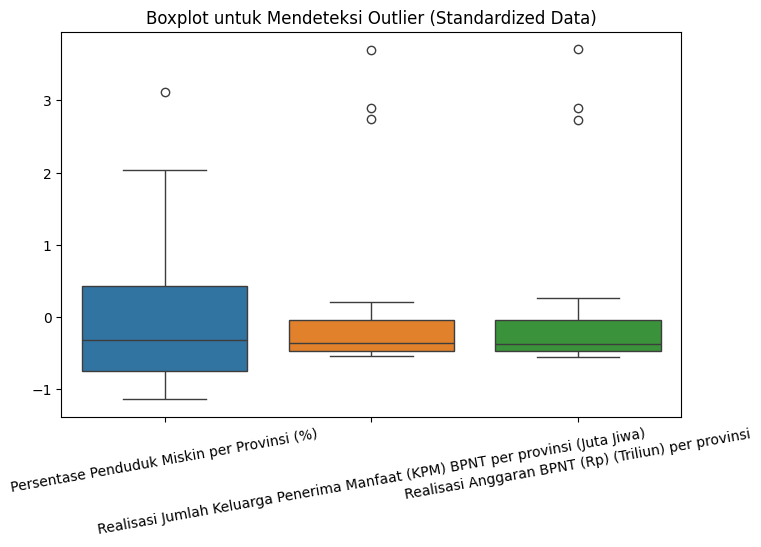

=== BATAS IQR ===
Lower bound:
 Persentase Penduduk Miskin per Provinsi (%)                                      -2.519795
Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)   -1.112288
Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi                              -1.111932
dtype: float64
Upper bound:
 Persentase Penduduk Miskin per Provinsi (%)                                       2.189693
Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)    0.601028
Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi                               0.589618
dtype: float64

=== PROVINSI YANG TERDETEKSI OUTLIER ===


,Tahun,Provinsi,Persentase Penduduk Miskin per Provinsi (%),Peringkat Ketahanan Pangan per Provinsi,Indeks Ketahanan Pangan (IKP)per Provinsi,Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)
11,2023,Jawa Barat,7.62,8,82.19,9.224720e+12,22178797
12,2023,Jawa Tengah,10.77,2,84.80,7.468470e+12,18023086
14,2023,Jawa Timur,10.35,7,82.46,7.128410e+12,17198004
33,2023,Papua,26.03,34,42.27,1.531370e+11,255228


In [ ]:
#IDENTIFIKASI OUTLIER

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("data_gabungan2.csv")
num_cols = [
    'Persentase Penduduk Miskin per Provinsi (%)',
    'Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)',
    'Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi'
]

scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

df_scaled = pd.DataFrame(scaled, columns=num_cols)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_scaled)
plt.title("Boxplot untuk Mendeteksi Outlier (Standardized Data)")
plt.xticks(rotation=10)
plt.show()

Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("=== BATAS IQR ===")
print("Lower bound:\n", lower_bound)
print("Upper bound:\n", upper_bound)

outlier_mask = (df_scaled < lower_bound) | (df_scaled > upper_bound)

outliers = df[outlier_mask.any(axis=1)]

print("\n=== PROVINSI YANG TERDETEKSI OUTLIER ===")
display(outliers)

=== MATRIX KORELASI SPEARMAN ===


,Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa),Persentase Penduduk Miskin per Provinsi (%),Indeks Ketahanan Pangan (IKP)per Provinsi
Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,1.000000,0.995111,0.142552,0.567609
Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa),0.995111,1.000000,0.118717,0.585332
Persentase Penduduk Miskin per Provinsi (%),0.142552,0.118717,1.000000,-0.279450
Indeks Ketahanan Pangan (IKP)per Provinsi,0.567609,0.585332,-0.279450,1.000000


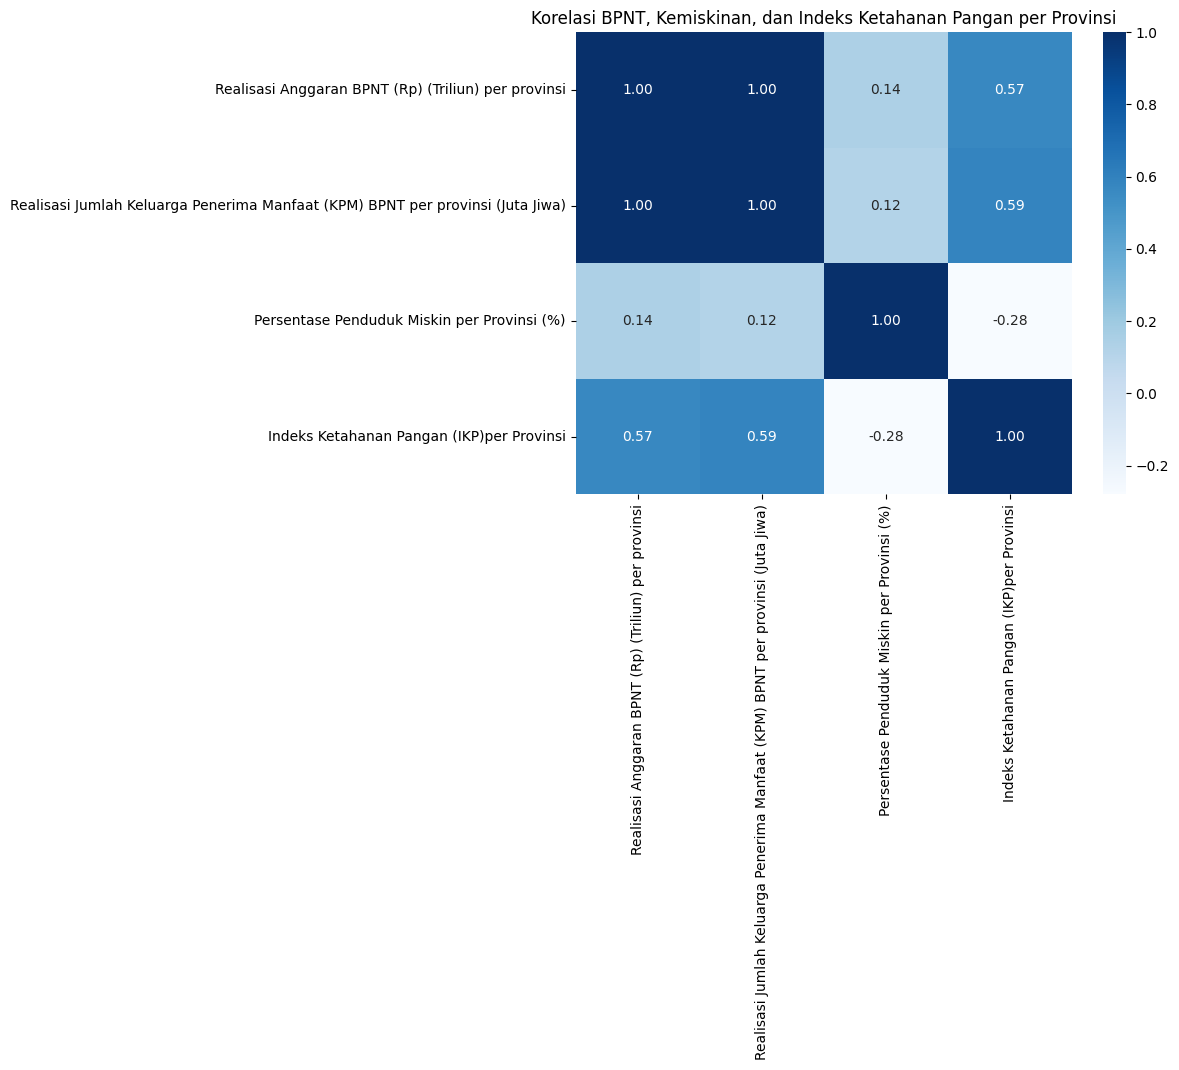

In [ ]:
# IDENTIFIKASI KORELASI BPNT, KEMISKINAN, IKP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = data_gabungan2[[
    'Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi',
    'Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)',
    'Persentase Penduduk Miskin per Provinsi (%)',
    'Indeks Ketahanan Pangan (IKP)per Provinsi'
]]

# Hitung matriks korelasi dengan Spearman
corr_matrix = data.corr(method='spearman')

print("=== MATRIX KORELASI SPEARMAN ===")
display(corr_matrix)

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Korelasi BPNT, Kemiskinan, dan Indeks Ketahanan Pangan per Provinsi")
plt.show()


In [ ]:
#DATA GROUPING
data_gabungan2["Kategori_Bantuan"] = pd.qcut(
    data_gabungan2['Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi'],
    q=3,
    labels=["Rendah", "Sedang", "Tinggi"]
)

data_gabungan2.head(10)


,Tahun,Provinsi,Persentase Penduduk Miskin per Provinsi (%),Peringkat Ketahanan Pangan per Provinsi,Indeks Ketahanan Pangan (IKP)per Provinsi,Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa),Kategori_Bantuan
0,2023,Aceh,14.45,22,72.96,1.125970e+12,2780856,Tinggi
1,2023,Sumatera Utara,8.15,16,75.97,1.807640e+12,3921537,Tinggi
2,2023,Sumatera Barat,5.95,5,83.22,7.492250e+11,1648519,Sedang
3,2023,Riau,6.68,29,68.68,6.201750e+11,1516642,Sedang
4,2023,Jambi,7.58,25,72.17,4.065980e+11,885167,Sedang
5,2023,Sumatera Selatan,11.78,20,73.82,1.103550e+12,2706411,Tinggi
6,2023,Bengkulu,14.04,23,72.27,3.347490e+11,819660,Sedang
7,2023,Lampung,11.11,10,81.56,1.658070e+12,4060111,Tinggi
8,2023,Kepulauan Bangka Belitung,4.52,27,71.14,1.051600e+11,200624,Rendah
9,2023,Kepulauan Riau,5.69,30,65.10,1.438610e+11,340268,Rendah


In [ ]:
#DATA SORTING PER PROVINSI
data_gabungan2.sort_values("Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi", ascending=False)

,Tahun,Provinsi,Persentase Penduduk Miskin per Provinsi (%),Peringkat Ketahanan Pangan per Provinsi,Indeks Ketahanan Pangan (IKP)per Provinsi,Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi,Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa),Kategori_Bantuan
11,2023,Jawa Barat,7.62,8,82.19,9.224720e+12,22178797,Tinggi
12,2023,Jawa Tengah,10.77,2,84.80,7.468470e+12,18023086,Tinggi
14,2023,Jawa Timur,10.35,7,82.46,7.128410e+12,17198004,Tinggi
1,2023,Sumatera Utara,8.15,16,75.97,1.807640e+12,3921537,Tinggi
7,2023,Lampung,11.11,10,81.56,1.658070e+12,4060111,Tinggi
26,2023,Sulawesi Selatan,8.70,4,83.36,1.427780e+12,3448517,Tinggi
15,2023,Banten,6.17,13,78.71,1.290190e+12,2847802,Tinggi
18,2023,Nusa Tenggara Timur,19.96,26,71.25,1.237490e+12,2665239,Tinggi
17,2023,Nusa Tenggara Barat,13.85,15,76.51,1.154710e+12,2803629,Tinggi
0,2023,Aceh,14.45,22,72.96,1.125970e+12,2780856,Tinggi


KORELASI BPNT vs PENURUNAN KEMISKINAN: -0.03189261661773292
INTERPRETASI: Agak efektif(ada pengaruh tapi lemah).


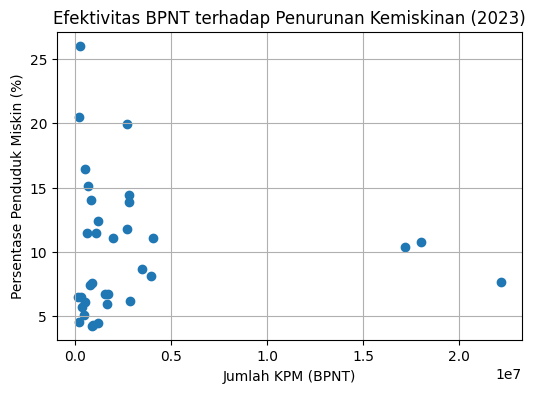

In [ ]:
df = pd.read_csv("data_gabungan2.csv")

x = 'Realisasi Jumlah Keluarga Penerima Manfaat (KPM) BPNT per provinsi (Juta Jiwa)'
y = 'Persentase Penduduk Miskin per Provinsi (%)'

corr_kemiskinan = df[x].corr(df[y])
print("KORELASI BPNT vs PENURUNAN KEMISKINAN:", corr_kemiskinan)

def interpret_ketahanan(corr):
    if corr < -0.5:
        return "Efektif(anggaran BPNT berkaitan kuat dengan penurunan kemiskinan (ketahanan pangan meningkat))."
    elif corr < -0.2:
        return "Cukup efektif(anggaran BPNT membantu menurunkan kemiskinan secara moderat)."
    elif corr < 0:
        return "Agak efektif(ada pengaruh tapi lemah)."
    elif corr < 0.2:
        return "Tidak efektif(hampir tidak ada dampak pada ketahanan pangan)."
    else:
        return "Tidak efektif(anggaran besar tidak menurunkan kemiskinan)."

print("INTERPRETASI:", interpret_ketahanan(corr_kemiskinan))


plt.figure(figsize=(6,4))
plt.scatter(df[x], df[y])
plt.xlabel("Jumlah KPM (BPNT)")
plt.ylabel("Persentase Penduduk Miskin (%)")
plt.title("Efektivitas BPNT terhadap Penurunan Kemiskinan (2023)")
plt.grid(True)
plt.show()


KORELASI ANGGARAN BPNT vs KETAHANAN PANGAN: 0.35606334205501555
INTERPRETASI: Tidak efektif(anggaran besar justru tidak meningkatkan ketahanan pangan).


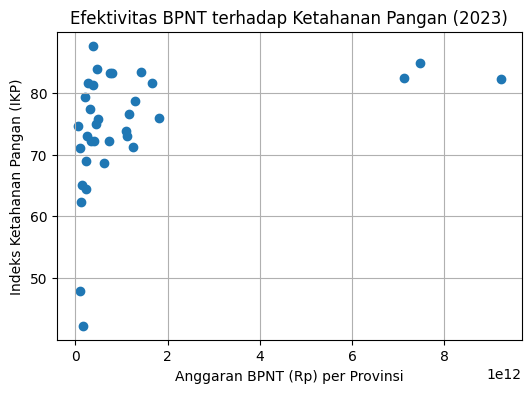

In [ ]:
x = 'Realisasi Anggaran BPNT (Rp) (Triliun) per provinsi'
y = 'Indeks Ketahanan Pangan (IKP)per Provinsi'

corr_ketahanan = df[x].corr(df[y])
print("KORELASI ANGGARAN BPNT vs KETAHANAN PANGAN:", corr_ketahanan)

def interpret_ketahanan(corr):
    if corr < -0.5:
        return "Efektif(anggaran BPNT berkaitan kuat dengan peningkatan ketahanan pangan)."
    elif corr < -0.2:
        return "Cukup efektif(ada pengaruh moderat meningkatkan ketahanan pangan)."
    elif corr < 0:
        return "Agak efektif(pengaruh kecil tapi arah negatif (baik))."
    elif corr < 0.2:
        return "Tidak efektif(hubungan sangat lemah atau tidak ada pengaruh)."
    else:
        return "Tidak efektif(anggaran besar justru tidak meningkatkan ketahanan pangan)."

print("INTERPRETASI:", interpret_ketahanan(corr_ketahanan))

plt.figure(figsize=(6,4))
plt.scatter(df[x], df[y])
plt.xlabel("Anggaran BPNT (Rp) per Provinsi")
plt.ylabel("Indeks Ketahanan Pangan (IKP)")
plt.title("Efektivitas BPNT terhadap Ketahanan Pangan (2023)")
plt.grid(True)
plt.show()


In [ ]:
data_gabungan2.to_csv('Data_Hasil_Proses_Wrangling.csv')